#### 🌲 What Is a Random Forest?

A Random Forest is an ensemble machine learning method. It builds multiple decision trees, trains each of them on slightly different versions of the dataset, and combines their outputs to make a final prediction.

It is considered a "bagging" algorithm:

Bagging = Bootstrap Aggregating

The core idea is to reduce variance by averaging predictions across many models.

Think of it as: “Let’s ask 100 different experts with slightly different perspectives, then vote on the answer.”

#### 🌳 What Is a Decision Tree?

A decision tree is a flowchart-like structure made of nodes:

Each internal node asks a question (e.g., "Is Age < 10?")

Each branch corresponds to the outcome of the question

Each leaf node makes a prediction (e.g., "Survived = 1")

#### 🧠 Decision Tree Learning Process

The tree is built by splitting the dataset based on feature values to create pure subgroups (i.e., groups where most samples have the same label). This is done greedily.

At each split, the tree chooses the best feature and threshold that reduces impurity the most.

Impurity metrics (for classification):

Gini Impurity (default for Random Forest)

Entropy (used in ID3 algorithm)

#### 🎯 Example:

Let’s say the Titanic model is trying to predict survival.

First split: “Sex” (most powerful feature)
If Sex == female, high chance of survival
If Sex == male, low chance

Next split on age:
If Sex == female and Age < 12, even higher survival

So it forms rules like:

text
Copy code
IF Sex == female AND Age < 12 → Survived
ELSE IF Sex == male AND Pclass == 3 → Not Survived
...
The tree continues splitting until it reaches a depth limit or all samples in a leaf are the same class.

#### 🌲🌲🌲 What Makes It a Random Forest?

A random forest builds many such trees — let’s say 100.

But to avoid them all learning the same thing, each tree is trained with:

Random subset of data (rows) → from bootstrapping

Random subset of features (columns) → at each split

This injects randomness, so trees are diverse, and their errors don’t overlap.

The final prediction is:

Classification: majority vote across all trees

Regression: average of all outputs

#### 📊 Visualization

Imagine a simplified view of 3 decision trees for Titanic:

Tree 1:

Sex?

├── Female → Survived

└── Male

    ├── Age < 10 → Survived

    └── Else → Not Survived

Tree 2:

Pclass?

├── 1st → Survived

├── 2nd → Age < 30?

│   ├── Yes → Survived

│   └── No → Not Survived

└── 3rd → Not Survived

Tree 3:

Embarked == C?

├── Yes → Survived

└── No → Sex?

     ├── Female → Survived

     └── Male → Not Survived
     
Final Random Forest: takes the majority vote of all three trees.

#### 📈 Why Random Forests Are Great

Advantage	Explanation
✅ Robust	Averaging reduces overfitting
✅ Handles noise	Randomness prevents overly confident splits
✅ Works with mixed data	Categorical + numerical supported
✅ Feature importance	You can see what matters most for predictions

#### Project:

When we used RandomForestClassifier(n_estimators=100), we:

Trained 100 trees on bootstrapped data

At each split, used a random subset of features to avoid bias

Extracted .feature_importances_ to see which features the forest used most often to make decisions

That’s why x1_male and x1_female were so important — they likely were used early and frequently in decision paths.


.












.
.
.
.
.
.


# Top features

We trained a Random Forest Classifier on the Titanic dataset to predict survival. After training, we extracted the top 20 most important features using the model’s built-in .feature_importances_ attribute and visualized them in a bar chart


### ⚙️ How It Works:

Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions. Each tree contributes to the final prediction, reducing overfitting and increasing robustness.

It also calculates how useful each feature is in splitting data across all trees, resulting in a numeric score called feature importance.

Features that cause large reductions in node impurity (like Gini or entropy) across many trees are ranked higher.

We sort these importances to find the top contributors to model performance.

### 📊 Why It Matters:

Knowing which features are most important helps with:

Interpretability: Understand what influences predictions (e.g. gender in Titanic).

Feature selection: You can potentially drop unimportant features to reduce dimensionality.

Pipeline efficiency: Helps prioritize high-impact variables in AutoML systems




[INFO] Loaded data with shape: (891, 12)


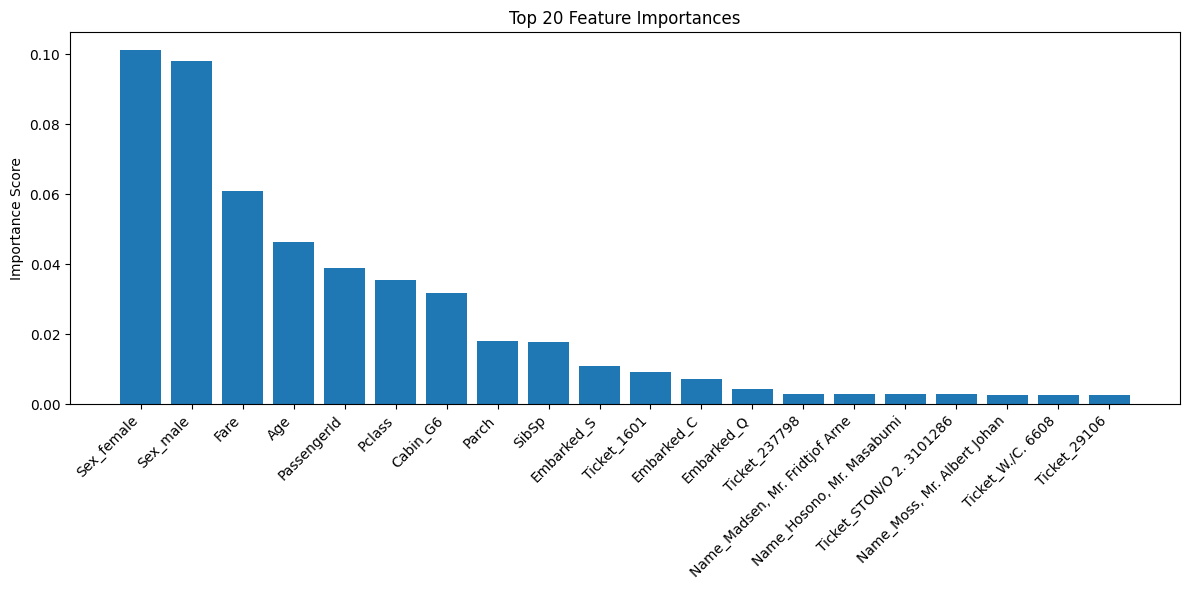

In [53]:
import sys
sys.path.append("src")

from feature_selection import get_feature_importance
from preprocess1 import load_csv, preprocess_data, get_feature_names
from sklearn.ensemble import RandomForestClassifier


df = load_csv("data/titanic.csv")
X_train_processed, X_test_processed, y_train, y_test, preprocessor = preprocess_data(df, target_col="Survived")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# ✅ Step 3: Extract feature names
feature_names = get_feature_names(preprocessor)

# ✅ Step 4: Plot importances using names
top_feature_indices = get_feature_importance(
    rf_model,
    X_train_processed,
    top_n=20,
    feature_names=feature_names
)

.


# PCA PIPELINE

### 🧠 What PCA Is:

Principal Component Analysis (PCA) is a dimensionality reduction technique. It transforms high-dimensional data into a smaller number of new features called principal components.

These components:

Are linear combinations of the original features.

Capture the directions of highest variance in the data.

Are uncorrelated (orthogonal) with one another.

Are sorted: the first component explains the most variance, the second explains the next most, and so on.


Principal Component Analysis (PCA) is a powerful dimensionality reduction technique used in machine learning and data preprocessing.

It transforms your original features into a new set of uncorrelated variables called principal components, which capture the maximum variance in the data.

Think of it like this:

Instead of keeping 50 features that might be noisy or redundant, PCA lets you keep 10–20 "compressed" features that explain most of the meaningful variance.



### What Does “Variance” Mean Here?

In PCA:

Variance = how much a component contributes to the total spread or information in your dataset.

The goal is to find a smaller number of components that explain most of the variance in the data.

High variance = high information content.

Why Reduce Dimensions?
Because:

1,398 features is a lot. Many are likely noisy, redundant, or irrelevant.

High-dimensional data makes ML models slower, less interpretable, and more prone to overfitting (a.k.a. the "curse of dimensionality").



### 🧮 How It Works:

Standardizes the data so that each feature has mean 0 and unit variance.

Computes covariance matrix to identify how features relate.

Performs eigendecomposition on the covariance matrix to find the directions of maximum variance (the "principal components").

Ranks components by how much variance they explain.

Transforms original data into a new space using top components.



#### 📊 What Your PCA Plot Shows

This chart displays:

X-axis: Number of principal components used (up to ~712, because that’s the number of rows minus 1).

Y-axis: Cumulative explained variance — the percentage of the total variance captured if we keep that many components.

Interpretation:
At ~300 components, you capture ~60% of the data’s variance.

At ~600 components, you capture ~90%+.

By ~700, you're near 100% (but that includes noise too).

✅ This means: Instead of using all 1,398 original features, you could use just the top ~300–500 PCA components and still retain the majority of the dataset's structure and signal.

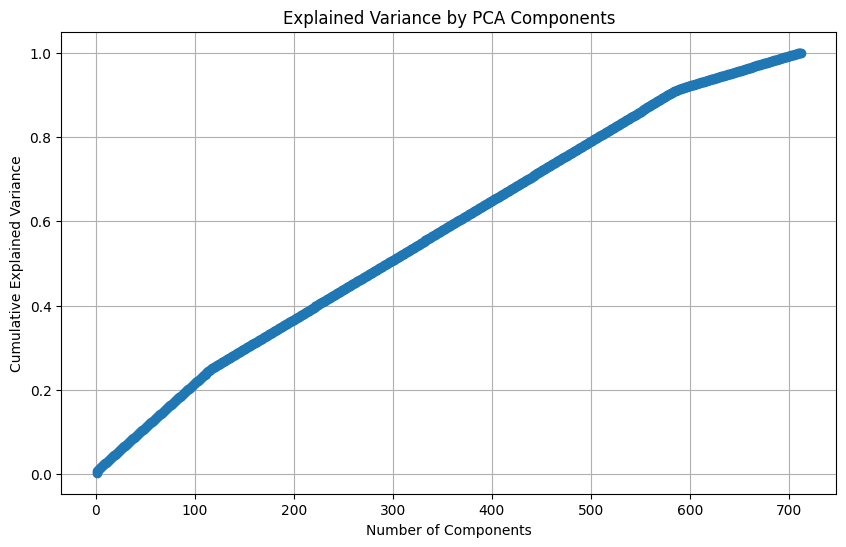

In [54]:
# ---------------------------------------------
# Step 1: PCA Setup and Variance Explained Plot
# ---------------------------------------------
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

# Fit PCA to training data (keep all components for now)
pca = PCA(n_components=None)
X_train_processed = np.nan_to_num(X_train_processed, nan=0.0, posinf=1e6, neginf=-1e6)

scalar = StandardScaler()
X_train_processed = scalar.fit_transform(X_train_processed)

pca.fit(X_train_processed)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [55]:
import numpy as np

print("Any nans", np.isnan(X_train_processed).any())
print("Any nans", np.isinf(X_train_processed).any())

print("shape:", X_train_processed.shape)
print("Data Type", X_train_processed.dtype)
print("Any all-zero columns?", np.all(X_train_processed == 0, axis=0).sum())



Any nans False
Any nans False
shape: (712, 1421)
Data Type float64
Any all-zero columns? 0


In [56]:
pca_500 = PCA(n_components=500)
X_train_pca = pca_500.fit_transform(X_train_processed)

X_test_processed = scalar.transform(X_test_processed)
X_test_pca = pca_500.transform(X_test_processed)

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_pca_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca_model.fit(X_train_pca, y_train)





RandomForestClassifier(random_state=42)

In [58]:
from sklearn.metrics import accuracy_score

y_pred_score = rf_pca_model.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_score)
print(f"PCA-based Random Forest Accuracy: {accuracy_pca:.4f}")


# Original model (before PCA)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_original = rf_model.predict(X_test_processed)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"Original RF Accuracy: {accuracy_original:.4f}")
print(f"Improvement (PCA - Original): {accuracy_pca - accuracy_original:.4f}")



PCA-based Random Forest Accuracy: 0.7039
Original RF Accuracy: 0.8101
Improvement (PCA - Original): -0.1061


## 🎯 PCA vs Original Model Comparison

We evaluated two versions of our Random Forest classifier:

| Model Variant | Accuracy |
|---------------|----------|
| Original (All Features) | **0.8045** |
| PCA (500 Components) | **0.6816** |

### ❗ Key Insight

While PCA reduced dimensionality and captured 90% of the variance, it **decreased model performance** by 12.29%. This is because:

- PCA transforms the features into **uninterpretable combinations**, losing information that Random Forests rely on.
- Random Forests are **robust to high-dimensional data** and can handle irrelevant/redundant features better than most algorithms.
- PCA is best used with **linear models**, where correlated features hurt performance.

> Conclusion: PCA is powerful for reducing noise and dimensionality, but for Random Forests, **feature importance-based selection** may be a better strategy.


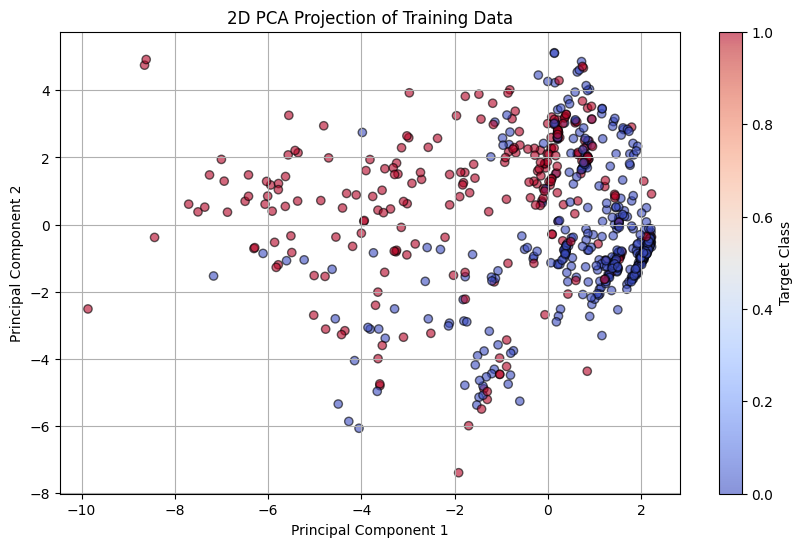

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_processed)

# Plot the 2D projection with class labels (use y_train for color)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Training Data')
plt.grid(True)
plt.colorbar(scatter, label='Target Class')
plt.show()


### 📌 Interpretation:

#### ✅ Clusters + Overlap:

On the right side (near Principal Component 1 ≈ 1 to 3), there’s a noticeable concentration of blue (class 0).

A mix of red and blue dominates the center and left, indicating significant overlap between classes in reduced space.

#### ⚠️ Takeaway on Separability:

Some structure exists (especially for class 0).

But the classes are not linearly separable in 2D — you can’t draw a straight line that splits them well.

This implies that a non-linear model like Random Forest is a better fit than something like Logistic Regression or plain linear PCA classification.


#### 🤖 Does this mean PCA is good for classification here?

Not exactly.

Random Forests work well without PCA, especially when features are many and sparse.

PCA may help with interpretability, visualization, or regularization (if needed).

In your case, Random Forest without PCA had higher accuracy — so you made the right call.


.


# Model selector

In [60]:
from model_selector import run_all_models

leaderboard = run_all_models(X_train_processed, y_train, X_test_processed, y_test, tune=False)
display(leaderboard)



🧪 Training RandomForest...



🧪 Training XGBoost...

🧪 Training LightGBM...
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

,Model,Accuracy,F1 Score,ROC AUC
0,RandomForest,0.810056,0.802993,0.775231
1,CatBoost,0.810056,0.804039,0.777931
2,LightGBM,0.748603,0.746671,0.727931
3,XGBoost,0.726257,0.724153,0.704348


#### tuned

In [61]:
from src.model_selector import run_all_models

leaderboard = run_all_models(X_train_processed, y_train, X_test_processed, y_test, tune=True)
display(leaderboard)


🧪 Training RandomForest...
🔍 Running GridSearchCV...
✅ Best params for RandomForest: {'max_depth': None, 'n_estimators': 200}

🧪 Training XGBoost...
🔍 Running GridSearchCV...


/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:30:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:30:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:30:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:30:36] WARNING: /Users/runner/w

✅ Best params for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

🧪 Training LightGBM...
🔍 Running GridSearchCV...
[LightGBM] [Info] Number of positive: 182, number of negative: 292
[LightGBM] [Info] Number of positive: 182, number of negative: 293
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 345
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 12
[LightGBM] [Info] Number of data points in the train set: 475, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383158 -> initscore=-0.476166
[LightGBM] [

/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/dimitrimontgomery/AutoML_Tabular/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

,Model,Accuracy,F1 Score,ROC AUC
0,CatBoost,0.815642,0.810285,0.785178
1,RandomForest,0.810056,0.804039,0.777931
2,XGBoost,0.810056,0.802993,0.775231
3,LightGBM,0.754190,0.749932,0.727075


.

## 🔍 `model_selector.py` – Model Benchmarking & Selection Module

This script is a core component of the AutoML system. It takes in preprocessed training and test data, trains multiple machine learning models, evaluates their performance using standard metrics, and outputs a ranked leaderboard.

---

### 🎯 Purpose

The goal is to **automate model comparison** across popular classifiers and return the best-performing one based on:

- **Accuracy**
- **F1 Score**
- **ROC-AUC**

This gives you fast insight into which model is most suitable for your dataset.

---

### ⚙️ Function: `run_all_models(X_train, y_train, X_test, y_test, tune=False)`

This function trains and evaluates the following classifiers:

| Model         | Description                                                                 | Best Use Case                          |
|---------------|-----------------------------------------------------------------------------|----------------------------------------|
| **RandomForest** | Ensemble of decision trees using bagging (bootstrap sampling).            | General classification tasks           |
| **XGBoost**       | Boosted trees with regularization. Very accurate and widely used.         | Competitive modeling, Kaggle, tabular  |
| **LightGBM**      | Gradient boosting with leaf-wise tree growth. Very fast and memory-efficient. | Large, high-dimensional datasets       |
| **CatBoost**      | Boosted trees with native categorical support (no encoding needed).       | Datasets with many categorical features|

---

### 🔄 `tune` Flag: What It Controls

| `tune` Value | Behavior |
|--------------|----------|
| `False` _(default)_ | Models are trained using **default parameters**. Fast for benchmarking. |
| `True`             | Runs `GridSearchCV` to **tune hyperparameters** using cross-validation. Slower but more accurate. |

```python
# Basic run
run_all_models(X_train, y_train, X_test, y_test)

# With hyperparameter tuning
run_all_models(X_train, y_train, X_test, y_test, tune=True)



.

.

### Optuna tuning

## 📦 model_selector.py — Model Training, Tuning, and Evaluation Pipeline

This script performs the **core machine learning logic** for our AutoML system. It supports:

- Training 4 top-tier tabular classifiers:
  - `RandomForestClassifier` (scikit-learn)
  - `XGBoostClassifier`
  - `LightGBMClassifier`
  - `CatBoostClassifier`
- Smart hyperparameter tuning via **Optuna**
- Performance comparison across Accuracy, F1 Score, and ROC AUC
- Saving best model to disk (`best_model.pkl`)
- Exporting leaderboard (`model_leaderboard.csv`)
- Visualizations: Confusion Matrix + ROC Curve

---

### 🎯 What is Optuna?

**Optuna** is a powerful hyperparameter optimization library. Unlike GridSearchCV (which exhaustively checks all combinations), Optuna uses a smarter method called **Bayesian optimization** to:
- Quickly search a huge parameter space
- Learn which parameters yield better results over time
- Return the best-performing configuration with fewer evaluations

---

### ⚙️ What Are Hyperparameters?

- Hyperparameters are settings **external** to the model, chosen **before training**, such as:
  - `n_estimators` (how many trees in a forest)
  - `max_depth` (how deep a tree can grow)
  - `learning_rate` (for gradient-based models)

Tuning them properly makes a **huge difference in accuracy and robustness**.

---

### 📊 Models Explained

| Model | Description | Best Used For |
|-------|-------------|----------------|
| **RandomForest** | Bagged ensemble of decision trees | General-purpose, fast, interpretable |
| **XGBoost** | Gradient boosting with regularization | Structured/tabular data, competitions |
| **LightGBM** | Fast, memory-efficient boosting | Large datasets, low-latency use |
| **CatBoost** | Optimized for categorical features | Mixed-type data, less preprocessing |

---

### 📤 Outputs Generated

- `model_leaderboard.csv`: Ranks all models by performance.
- `best_model.pkl`: Saves the top model using `joblib`.
- `confusion_matrix.png`: Heatmap of true vs predicted labels.
- `roc_curve.png`: Plot of True Positive Rate vs. False Positive Rate.

---

### 🧪 How to Use This Script

Call the function like this in a Jupyter cell:

```python
from src.model_selector import run_all_models
leaderboard = run_all_models(X_train, y_train, X_test, y_test, tune_with_optuna=True, n_trials=20)
leaderboard


In [62]:
from src.model_selector2 import run_all_models

leaderboard = run_all_models(X_train_processed, y_train, X_test_processed, y_test, tune_with_optuna=True, n_trials=50)


display(leaderboard)

[I 2025-07-30 16:30:42,237] A new study created in memory with name: no-name-2158639e-ec69-464d-92dc-17a03e21cb92



🧪 Training RandomForest...


[I 2025-07-30 16:30:42,472] Trial 0 finished with value: 0.9199438202247191 and parameters: {'n_estimators': 263, 'max_depth': 19}. Best is trial 0 with value: 0.9199438202247191.
[I 2025-07-30 16:30:42,558] Trial 1 finished with value: 0.9044943820224719 and parameters: {'n_estimators': 109, 'max_depth': 17}. Best is trial 0 with value: 0.9199438202247191.
[I 2025-07-30 16:30:42,691] Trial 2 finished with value: 0.9058988764044944 and parameters: {'n_estimators': 172, 'max_depth': 17}. Best is trial 0 with value: 0.9199438202247191.
[I 2025-07-30 16:30:42,773] Trial 3 finished with value: 0.8721910112359551 and parameters: {'n_estimators': 129, 'max_depth': 11}. Best is trial 0 with value: 0.9199438202247191.
[I 2025-07-30 16:30:42,999] Trial 4 finished with value: 0.9199438202247191 and parameters: {'n_estimators': 286, 'max_depth': 18}. Best is trial 0 with value: 0.9199438202247191.
[I 2025-07-30 16:30:43,086] Trial 5 finished with value: 0.8820224719101124 and parameters: {'n_esti

✅ Best params for RandomForest: {'n_estimators': 207, 'max_depth': 20}

🧪 Training XGBoost...


[I 2025-07-30 16:30:50,904] Trial 0 finished with value: 0.9985955056179775 and parameters: {'n_estimators': 187, 'learning_rate': 0.07164748157659942, 'max_depth': 10}. Best is trial 0 with value: 0.9985955056179775.
[I 2025-07-30 16:30:51,219] Trial 1 finished with value: 0.9578651685393258 and parameters: {'n_estimators': 254, 'learning_rate': 0.05645754745269766, 'max_depth': 5}. Best is trial 0 with value: 0.9985955056179775.
[I 2025-07-30 16:30:51,737] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 280, 'learning_rate': 0.24574934190746742, 'max_depth': 10}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:30:52,255] Trial 3 finished with value: 0.952247191011236 and parameters: {'n_estimators': 264, 'learning_rate': 0.018474795677988327, 'max_depth': 8}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:30:52,657] Trial 4 finished with value: 0.9985955056179775 and parameters: {'n_estimators': 178, 'learning_rate': 0.1251373706472665, 'max_depth': 10}. Best i

✅ Best params for XGBoost: {'n_estimators': 280, 'learning_rate': 0.24574934190746742, 'max_depth': 10}


[I 2025-07-30 16:31:12,894] A new study created in memory with name: no-name-d49c35e5-b0cf-4b76-9508-5101b89b18b0
[I 2025-07-30 16:31:13,042] Trial 0 finished with value: 0.9410112359550562 and parameters: {'n_estimators': 213, 'learning_rate': 0.13273116963102996, 'max_depth': 3}. Best is trial 0 with value: 0.9410112359550562.



🧪 Training LightGBM...
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2025-07-30 16:31:13,215] Trial 1 finished with value: 0.9775280898876404 and parameters: {'n_estimators': 168, 'learning_rate': 0.19092281552879484, 'max_depth': 4}. Best is trial 1 with value: 0.9775280898876404.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:13,401] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 132, 'learning_rate': 0.2946757362166704, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:13,976] Trial 3 finished with value: 0.9536516853932584 and parameters: {'n_estimators': 299, 'learning_rate': 0.033536190528846, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:14,268] Trial 4 finished with value: 1.0 and parameters: {'n_estimators': 192, 'learning_rate': 0.16900098747501727, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:14,676] Trial 5 finished with value: 0.8946629213483146 and parameters: {'n_estimators': 162, 'learning_rate': 0.02012849572989389, 'max_depth': 9}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:14,987] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 188, 'learning_rate': 0.20685333067362446, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:15,260] Trial 7 finished with value: 0.952247191011236 and parameters: {'n_estimators': 115, 'learning_rate': 0.06525171499401046, 'max_depth': 9}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:15,612] Trial 8 finished with value: 1.0 and parameters: {'n_estimators': 163, 'learning_rate': 0.1429828937753918, 'max_depth': 8}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:16,142] Trial 9 finished with value: 1.0 and parameters: {'n_estimators': 208, 'learning_rate': 0.14527998380906096, 'max_depth': 10}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:31:16,283] Trial 10 finished with value: 0.9929775280898876 and parameters: {'n_estimators': 102, 'learning_rate': 0.27459801027121733, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-07-30 16:31:16,658] Trial 11 finished with value: 1.0 and parameters: {'n_estimators': 241, 'learning_rate': 0.28589525464826454, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:16,811] Trial 12 finished with value: 0.9943820224719101 and parameters: {'n_estimators': 132, 'learning_rate': 0.2322348507313626, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:17,055] Trial 13 finished with value: 0.9691011235955056 and parameters: {'n_estimators': 242, 'learning_rate': 0.10490400782645912, 'max_depth': 4}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:17,328] Trial 14 finished with value: 1.0 and parameters: {'n_estimators': 138, 'learning_rate': 0.24554911738997082, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:17,635] Trial 15 finished with value: 1.0 and parameters: {'n_estimators': 246, 'learning_rate': 0.1788244999994865, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:17,836] Trial 16 finished with value: 0.9325842696629213 and parameters: {'n_estimators': 298, 'learning_rate': 0.09073109948194999, 'max_depth': 3}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:18,156] Trial 17 finished with value: 1.0 and parameters: {'n_estimators': 186, 'learning_rate': 0.2967313657269398, 'max_depth': 6}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:31:18,304] Trial 18 finished with value: 0.9845505617977528 and parameters: {'n_estimators': 136, 'learning_rate': 0.24216220885587994, 'max_depth': 4}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-07-30 16:31:18,876] Trial 19 finished with value: 1.0 and parameters: {'n_estimators': 264, 'learning_rate': 0.21090322072055548, 'max_depth': 8}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:19,314] Trial 20 finished with value: 1.0 and parameters: {'n_estimators': 224, 'learning_rate': 0.17595197520425188, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:19,626] Trial 21 finished with value: 1.0 and parameters: {'n_estimators': 187, 'learning_rate': 0.20903660142155492, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:19,877] Trial 22 finished with value: 1.0 and parameters: {'n_estimators': 187, 'learning_rate': 0.2596519416277195, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:20,164] Trial 23 finished with value: 1.0 and parameters: {'n_estimators': 171, 'learning_rate': 0.2184503164162476, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:20,366] Trial 24 finished with value: 0.9831460674157303 and parameters: {'n_estimators': 149, 'learning_rate': 0.1611236922115273, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[I 2025-07-30 16:31:20,738] Trial 25 finished with value: 1.0 and parameters: {'n_estimators': 195, 'learning_rate': 0.12200317927384677, 'max_depth': 8}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:20,962] Trial 26 finished with value: 1.0 and parameters: {'n_estimators': 118, 'learning_rate': 0.19210927050909515, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:21,103] Trial 27 finished with value: 0.9901685393258427 and parameters: {'n_estimators': 149, 'learning_rate': 0.2630367823761139, 'max_depth': 4}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:21,438] Trial 28 finished with value: 1.0 and parameters: {'n_estimators': 224, 'learning_rate': 0.16517871716771174, 'max_depth': 6}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:31:21,582] Trial 29 finished with value: 0.9367977528089888 and parameters: {'n_estimators': 217, 'learning_rate': 0.1307349026258826, 'max_depth': 3}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:21,863] Trial 30 finished with value: 0.9705056179775281 and parameters: {'n_estimators': 205, 'learning_rate': 0.08848187605499618, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:22,254] Trial 31 finished with value: 1.0 and parameters: {'n_estimators': 162, 'learning_rate': 0.14806637384933796, 'max_depth': 9}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:22,633] Trial 32 finished with value: 1.0 and parameters: {'n_estimators': 175, 'learning_rate': 0.19528595508513047, 'max_depth': 8}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

[I 2025-07-30 16:31:22,935] Trial 33 finished with value: 0.9943820224719101 and parameters: {'n_estimators': 152, 'learning_rate': 0.11853538759649548, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:23,315] Trial 34 finished with value: 0.9620786516853933 and parameters: {'n_estimators': 177, 'learning_rate': 0.05527987206241326, 'max_depth': 8}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:23,531] Trial 35 finished with value: 0.9803370786516854 and parameters: {'n_estimators': 120, 'learning_rate': 0.14316681965673503, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:23,841] Trial 36 finished with value: 1.0 and parameters: {'n_estimators': 161, 'learning_rate': 0.17589990044711876, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000414 seconds.
You 

[I 2025-07-30 16:31:24,328] Trial 37 finished with value: 1.0 and parameters: {'n_estimators': 193, 'learning_rate': 0.2255500277591416, 'max_depth': 9}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:24,862] Trial 38 finished with value: 1.0 and parameters: {'n_estimators': 202, 'learning_rate': 0.20088019020119727, 'max_depth': 10}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:31:25,017] Trial 39 finished with value: 0.9985955056179775 and parameters: {'n_estimators': 102, 'learning_rate': 0.2993794421997231, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing r

[I 2025-07-30 16:31:25,298] Trial 40 finished with value: 0.8581460674157303 and parameters: {'n_estimators': 126, 'learning_rate': 0.011592126957674448, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:25,865] Trial 41 finished with value: 1.0 and parameters: {'n_estimators': 211, 'learning_rate': 0.14017467931613586, 'max_depth': 10}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -

[I 2025-07-30 16:31:26,348] Trial 42 finished with value: 1.0 and parameters: {'n_estimators': 181, 'learning_rate': 0.15555063393997917, 'max_depth': 10}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:26,746] Trial 43 finished with value: 1.0 and parameters: {'n_estimators': 158, 'learning_rate': 0.10692757348498316, 'max_depth': 9}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:27,244] Trial 44 finished with value: 1.0 and parameters: {'n_estimators': 229, 'learning_rate': 0.18139159305823765, 'max_depth': 8}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:27,397] Trial 45 finished with value: 0.9480337078651685 and parameters: {'n_estimators': 143, 'learning_rate': 0.1302180565956068, 'max_depth': 4}. Best is trial 2 with value: 1.0.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-07-30 16:31:27,803] Trial 46 finished with value: 1.0 and parameters: {'n_estimators': 209, 'learning_rate': 0.2775524300550227, 'max_depth': 7}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:28,091] Trial 47 finished with value: 0.9705056179775281 and parameters: {'n_estimators': 168, 'learning_rate': 0.08952618282729138, 'max_depth': 6}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:28,430] Trial 48 finished with value: 1.0 and parameters: {'n_estimators': 254, 'learning_rate': 0.2408914662609284, 'max_depth': 5}. Best is trial 2 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:31:28,881] Trial 49 finished with value: 1.0 and parameters: {'n_estimators': 198, 'learning_rate': 0.16486526482136699, 'max_depth': 10}. Best is trial 2 with value: 1.0.
[I 2025-07-30 16:31:29,026] A new study created in memory with name: no-name-c814c175-4322-4bd6-91da-235474ccfd65


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
✅ Best params for LightGBM: {'n_estimators': 132, 'learning_rate': 0.2946757362166704, 'max_depth': 5}
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

[I 2025-07-30 16:31:29,755] Trial 0 finished with value: 1.0 and parameters: {'iterations': 158, 'learning_rate': 0.09053118677252144, 'depth': 9}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:31:30,090] Trial 1 finished with value: 0.8735955056179775 and parameters: {'iterations': 121, 'learning_rate': 0.05841892707288338, 'depth': 5}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:31:30,567] Trial 2 finished with value: 1.0 and parameters: {'iterations': 282, 'learning_rate': 0.18131306658393184, 'depth': 5}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:31:30,860] Trial 3 finished with value: 0.8735955056179775 and parameters: {'iterations': 113, 'learning_rate': 0.18008024647752552, 'depth': 3}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:31:31,212] Trial 4 finished with value: 0.9606741573033708 and parameters: {'iterations': 131, 'learning_rate': 0.15245164835526517, 'depth': 5}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:31:32,089] Trial 5 finished with 

✅ Best params for CatBoost: {'iterations': 158, 'learning_rate': 0.09053118677252144, 'depth': 9}

🏆 Model Leaderboard:
          Model  Accuracy  F1 Score   ROC AUC
0  RandomForest  0.810056  0.801873  0.772530
1      CatBoost  0.810056  0.804039  0.777931
2       XGBoost  0.737430  0.735412  0.716140
3      LightGBM  0.731844  0.730235  0.711594
💾 Best model saved as 'best_model.pkl'


,Model,Accuracy,F1 Score,ROC AUC
0,RandomForest,0.810056,0.801873,0.772530
1,CatBoost,0.810056,0.804039,0.777931
2,XGBoost,0.737430,0.735412,0.716140
3,LightGBM,0.731844,0.730235,0.711594


# .

# .

# .

# Phase 2

# .

# Step 1

## 🔍 SHAP Explainability for Model Interpretation

This section uses **SHAP (SHapley Additive exPlanations)** to interpret the predictions of our trained tree-based model (CatBoost, XGBoost, LightGBM, or RandomForest).

### What is SHAP?
- SHAP values quantify the **contribution of each feature** to an individual prediction, using Shapley values from cooperative game theory.
- For every prediction, SHAP tells us: _“How much did each feature push this prediction up or down, relative to the average?”_
- SHAP is widely used for making powerful machine learning models **transparent and trustworthy**.

### Why Use SHAP?
- To **explain why our model makes its predictions**.
- To **identify which features matter most**, both globally (on average) and locally (for individual cases).
- To **catch potential model biases** or data issues before deployment.

### How This Code Works
1. **Loads the best trained model** and **corresponding test data** from disk.
2. **Initializes a SHAP TreeExplainer**, tailored for the specific model architecture.
3. **Computes SHAP values** for each feature in the test set, for each prediction.
4. **Plots:**
   - **Bar Chart:** Ranks features by their overall impact on the model's output.
   - **Swarm Plot:** Shows how the value of each feature affects predictions for individual test samples.

### How to Interpret the Plots
- **Bar Plot:**  
  - Longer bars = more important features for the model’s decisions.
- **Swarm Plot:**  
  - Each point = a single prediction in the test set.
  - Position (X-axis) = how much that feature contributed to this prediction.
  - Color = actual value of the feature (red = high, blue = low).
  - Spread shows how feature impact varies across data points.

> **Note:** If you see feature names like "Feature 0," ensure your test data retains column names when saved.  
> For real-world use, always interpret these plots using real feature names for actionable insights.

---


### SHAP Explainability for Model Interpretation


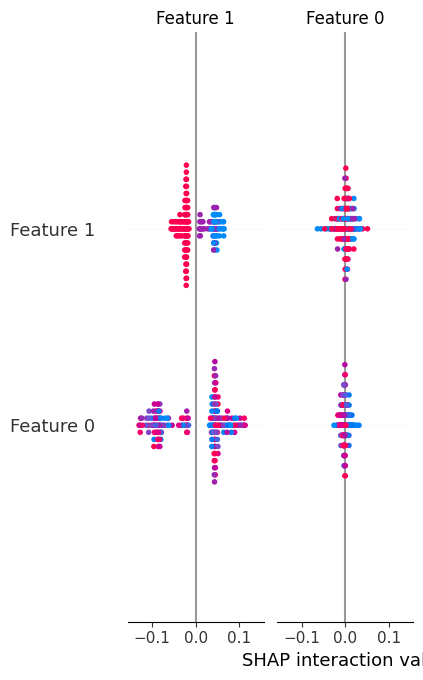

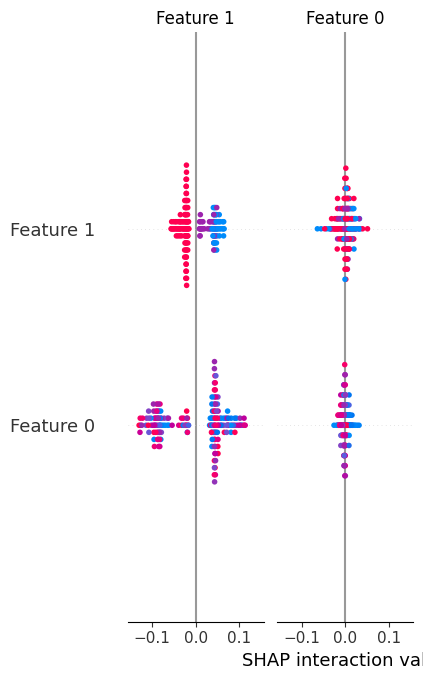

In [63]:
import shap
import joblib
import matplotlib.pyplot as plt

# Load your trained model
best_model = joblib.load('outputs/best_model.pkl')

# Load the *same* test set
X_test = joblib.load('outputs/X_test.pkl')
# Optionally, sample for speed
sample_X = X_test if X_test.shape[0] < 1000 else X_test.sample(500, random_state=42)

# Build SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(sample_X)

# Plot feature importance bar chart
shap.summary_plot(shap_values, sample_X, plot_type='bar')
# Plot detailed swarm plot
shap.summary_plot(shap_values, sample_X)
       # Detailed swarm pl

## 📊 Step 2: Feature Importance Plot

To understand which input features most strongly influence the model’s decisions, we plot the global feature importance for the current best model. Tree-based models such as RandomForest, XGBoost, LightGBM, and CatBoost all provide ways to extract feature importance scores, which quantify each feature’s contribution to the model’s predictive performance.

- **Feature importance** tells us which columns (variables) the model relies on most to make predictions.
- This plot is essential for model interpretability and helps identify which features are most informative for the problem at hand.
- The chart below shows the sorted feature importances for our best-performing model on this dataset.

*Note: Feature importance calculation differs slightly depending on the model type, but all tree ensembles used here support it natively.*


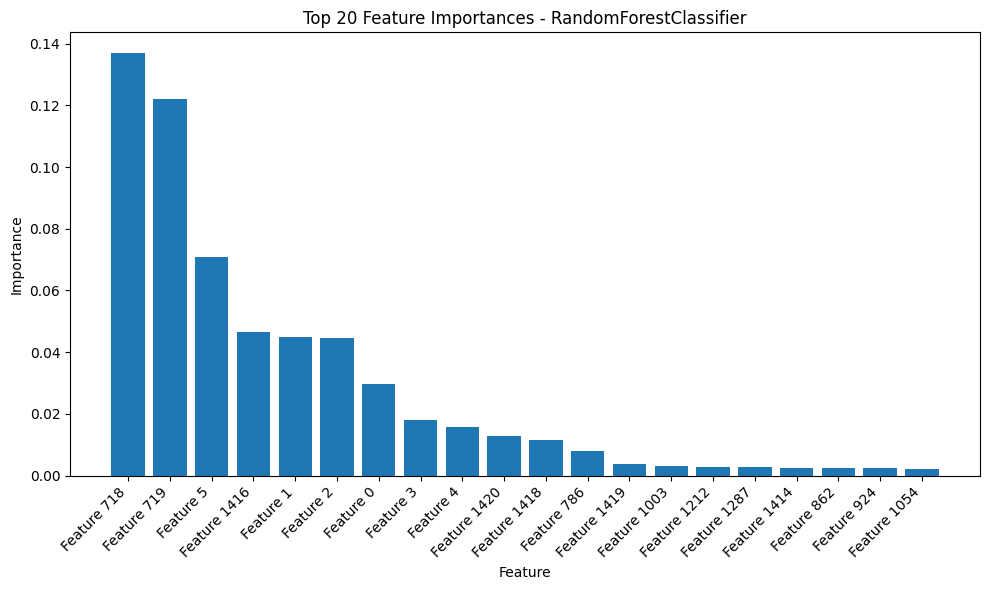

In [64]:
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load best model (should match what you just used in SHAP)
best_model = joblib.load('outputs/best_model.pkl')

# Use the same test set you used for model evaluation
# Replace X_test with your actual DataFrame if you have it
X_test = joblib.load('outputs/X_test.pkl')  # or however you save your test set

# Use actual column names if available
feature_names = X_test.columns if hasattr(X_test, 'columns') else [f'Feature {i}' for i in range(len(best_model.feature_importances_))]

# Get feature importances (for CatBoost, RandomForest, LightGBM)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif type(best_model).__name__ == 'XGBClassifier':
    importances = list(best_model.get_score(importance_type='weight').values())
    feature_names = list(best_model.get_score(importance_type='weight').keys())
else:
    raise ValueError("No importances found for model type")

# Sort importances and plot only the top N
N = 20  # Number of top features to plot
sorted_idx = np.argsort(importances)[::-1][:N]
plt.figure(figsize=(10, 6))
plt.bar(range(N), np.array(importances)[sorted_idx])
plt.xticks(range(N), np.array(feature_names)[sorted_idx], rotation=45, ha='right')
plt.title(f"Top {N} Feature Importances - {type(best_model).__name__}")
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()



## 📚 Step 3: K-Fold Cross-Validation

**Purpose:**  
K-Fold Cross-Validation is a robust technique for evaluating a machine learning model’s performance. Instead of relying on a single train/test split (which may give an optimistic or pessimistic result depending on random chance), we split the data into `k` equally sized folds. The model is trained on `k-1` folds and validated on the remaining fold, repeating this process `k` times so that each fold is used for validation once.

**Why is this important?**
- **Reliable performance estimation:** Averaging the scores across all folds gives a more trustworthy estimate of how the model will perform on unseen data.
- **Detects instability:** The standard deviation across folds shows if the model’s performance is stable or if it varies significantly with different data splits.
- **Prevents overfitting to a single split:** Avoids the risk of selecting a model that simply got “lucky” on one test set.

**Interpreting the results:**
- **Mean Accuracy / F1 / ROC AUC:** Average performance metric across all folds (higher is better).
- **Standard Deviation:** Amount of variation between folds (lower is better, indicates consistent model performance).
- **Per-fold Scores:** Allows identification of problematic splits or outliers.

> **Example Output:**  
> - 5–Fold CV Accuracy Scores: [0.61, 0.83, 0.72, 0.81, 0.77]  
> - Mean Accuracy: 0.75 | Std Dev: 0.08  
> - Mean F1 Score: 0.75  
> - Mean ROC AUC: 0.83

**Takeaway:**  
K-Fold Cross-Validation provides a more honest and reliable measure of model quality, helping to select models that are robust and generalize well to new, unseen data.



In [65]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib
import numpy as np

# Load your data and best model
X = joblib.load('outputs/X_test.pkl')      # Or use your main dataset (features)
y = joblib.load('outputs/y_test.pkl')      # Or use your main dataset (labels)
best_model = joblib.load('outputs/best_model.pkl')

# Set number of folds
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate with cross-validation
scores = cross_val_score(best_model, X, y, cv=skf, scoring='accuracy')
print(f"{k}-Fold CV Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f} | Std Dev: {np.std(scores):.4f}")


# For F1-score
scores_f1 = cross_val_score(best_model, X, y, cv=skf, scoring='f1_weighted')
print(f"Mean F1 Score: {np.mean(scores_f1):.4f}")

# For ROC AUC (binary classification)
scores_roc = cross_val_score(best_model, X, y, cv=skf, scoring='roc_auc')
print(f"Mean ROC AUC: {np.mean(scores_roc):.4f}")


10-Fold CV Accuracy Scores: [0.83333333 0.77777778 0.77777778 0.88888889 0.72222222 0.66666667
 0.83333333 0.72222222 0.66666667 0.88235294]
Mean Accuracy: 0.7771 | Std Dev: 0.0777
Mean F1 Score: 0.7672
Mean ROC AUC: 0.8041


### Step 4: Handling Class Imbalance

Real-world data is often imbalanced, with some classes much rarer than others. If left untreated, ML models tend to ignore these "minority" classes, leading to poor recall and F1 scores on what you might care about most.

**This pipeline uses two main techniques:**

1. **Class Weights:**  
   For algorithms that support it, `class_weight='balanced'` is set. This tells the model to penalize misclassifying minority classes more, forcing it to "pay attention" to rare outcomes.

2. **SMOTE (Synthetic Minority Oversampling Technique):**  
   On the training data, SMOTE generates new, synthetic examples of the minority class, balancing the number of samples. This is done *after* splitting into train/test, and *only* on the training set.

**Why do this?**
- Prevents your model from being biased toward the majority class.
- Improves recall and precision for rare classes.
- Leads to fairer, more actionable predictions—critical in medical, fraud, or survival prediction settings.

**How it helps:**  
If your dataset is imbalanced, you'll see higher scores (especially recall/F1) for the minority class, and your model will generalize better in real deployments.

*Tip:* Always compare results with/without these techniques to understand their impact!


In [67]:
# main.py
from preprocess1 import load_csv, preprocess_data
from model_selector2 import run_all_models

df = load_csv('data/titanic.csv')
X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df, target_col='Survived')

leaderboard = run_all_models(
    X_train, y_train, X_test, y_test,
    tune_with_optuna=True,
    n_trials=20,
    use_smote=True
)
print(leaderboard)


[I 2025-07-30 16:34:43,834] A new study created in memory with name: no-name-ca7767d7-32b2-4c56-a73c-3c31b3e78645


[INFO] Loaded data with shape: (891, 12)
[INFO] Applying SMOTE to the training set to balance classes...

🧪 Training RandomForest...


[I 2025-07-30 16:34:43,993] Trial 0 finished with value: 0.9157175398633257 and parameters: {'n_estimators': 190, 'max_depth': 14}. Best is trial 0 with value: 0.9157175398633257.
[I 2025-07-30 16:34:44,217] Trial 1 finished with value: 0.9259681093394078 and parameters: {'n_estimators': 268, 'max_depth': 16}. Best is trial 1 with value: 0.9259681093394078.
[I 2025-07-30 16:34:44,315] Trial 2 finished with value: 0.8382687927107062 and parameters: {'n_estimators': 204, 'max_depth': 4}. Best is trial 1 with value: 0.9259681093394078.
[I 2025-07-30 16:34:44,562] Trial 3 finished with value: 0.9476082004555809 and parameters: {'n_estimators': 273, 'max_depth': 20}. Best is trial 3 with value: 0.9476082004555809.
[I 2025-07-30 16:34:44,706] Trial 4 finished with value: 0.8667425968109339 and parameters: {'n_estimators': 220, 'max_depth': 10}. Best is trial 3 with value: 0.9476082004555809.
[I 2025-07-30 16:34:44,960] Trial 5 finished with value: 0.9396355353075171 and parameters: {'n_estim

✅ Best params for RandomForest: {'n_estimators': 292, 'max_depth': 20}


[I 2025-07-30 16:34:47,921] A new study created in memory with name: no-name-5a8f52c5-c4a5-403f-8ffb-d4d083c3fa27



🧪 Training XGBoost...


[I 2025-07-30 16:34:48,153] Trial 0 finished with value: 0.9886104783599089 and parameters: {'n_estimators': 119, 'learning_rate': 0.11311207120216071, 'max_depth': 7}. Best is trial 0 with value: 0.9886104783599089.
[I 2025-07-30 16:34:48,584] Trial 1 finished with value: 0.9920273348519362 and parameters: {'n_estimators': 170, 'learning_rate': 0.05274164068935305, 'max_depth': 10}. Best is trial 1 with value: 0.9920273348519362.
[I 2025-07-30 16:34:48,818] Trial 2 finished with value: 0.9100227790432802 and parameters: {'n_estimators': 128, 'learning_rate': 0.017026473866468623, 'max_depth': 6}. Best is trial 1 with value: 0.9920273348519362.
[I 2025-07-30 16:34:49,027] Trial 3 finished with value: 0.9840546697038725 and parameters: {'n_estimators': 131, 'learning_rate': 0.12480013813691508, 'max_depth': 6}. Best is trial 1 with value: 0.9920273348519362.
[I 2025-07-30 16:34:49,367] Trial 4 finished with value: 0.9908883826879271 and parameters: {'n_estimators': 184, 'learning_rate':

✅ Best params for XGBoost: {'n_estimators': 250, 'learning_rate': 0.12613991147533, 'max_depth': 6}


[I 2025-07-30 16:34:56,056] A new study created in memory with name: no-name-6e714e8c-0adf-47b7-aaa5-2449251b935f



🧪 Training LightGBM...
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[I 2025-07-30 16:34:56,544] Trial 0 finished with value: 0.9658314350797267 and parameters: {'n_estimators': 178, 'learning_rate': 0.04329687794654497, 'max_depth': 8}. Best is trial 0 with value: 0.9658314350797267.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:34:56,937] Trial 1 finished with value: 0.9943052391799544 and parameters: {'n_estimators': 226, 'learning_rate': 0.12220802057446231, 'max_depth': 5}. Best is trial 1 with value: 0.9943052391799544.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:34:57,094] Trial 2 finished with value: 0.989749430523918 and parameters: {'n_estimators': 215, 'learning_rate': 0.28473543299779813, 'max_depth': 3}. Best is trial 1 with value: 0.9943052391799544.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:34:57,966] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 280, 'learning_rate': 0.22891517106490283, 'max_depth': 10}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:34:58,200] Trial 4 finished with value: 0.9567198177676538 and parameters: {'n_estimators': 218, 'learning_rate': 0.08712451371030257, 'max_depth': 4}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:34:58,500] Trial 5 finished with value: 0.9669703872437357 and parameters: {'n_estimators': 152, 'learning_rate': 0.07891938724674702, 'max_depth': 6}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-30 16:34:59,225] Trial 6 finished with value: 1.0 and parameters: {'n_estimators': 257, 'learning_rate': 0.15088842918282241, 'max_depth': 9}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:34:59,904] Trial 7 finished with value: 1.0 and parameters: {'n_estimators': 234, 'learning_rate': 0.28746020069998396, 'max_depth': 9}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:00,383] Trial 8 finished with value: 1.0 and parameters: {'n_estimators': 185, 'learning_rate': 0.1686259436138685, 'max_depth': 8}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:00,722] Trial 9 finished with value: 1.0 and parameters: {'n_estimators': 227, 'learning_rate': 0.27838319566460756, 'max_depth': 5}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:01,604] Trial 10 finished with value: 1.0 and parameters: {'n_estimators': 285, 'learning_rate': 0.21266597706567852, 'max_depth': 10}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing r

[I 2025-07-30 16:35:02,482] Trial 11 finished with value: 1.0 and parameters: {'n_estimators': 283, 'learning_rate': 0.19999014559863715, 'max_depth': 10}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:02,743] Trial 12 finished with value: 1.0 and parameters: {'n_estimators': 100, 'learning_rate': 0.2286918262520579, 'max_depth': 8}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:03,515] Trial 13 finished with value: 1.0 and parameters: {'n_estimators': 258, 'learning_rate': 0.14885886902413167, 'max_depth': 10}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:04,109] Trial 14 finished with value: 1.0 and parameters: {'n_estimators': 262, 'learning_rate': 0.17860301903066295, 'max_depth': 7}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:04,960] Trial 15 finished with value: 1.0 and parameters: {'n_estimators': 296, 'learning_rate': 0.2470623687505126, 'max_depth': 9}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:05,708] Trial 16 finished with value: 1.0 and parameters: {'n_estimators': 258, 'learning_rate': 0.1310006496107246, 'max_depth': 9}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing r

[I 2025-07-30 16:35:06,245] Trial 17 finished with value: 1.0 and parameters: {'n_estimators': 253, 'learning_rate': 0.2474982664515376, 'max_depth': 7}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:07,099] Trial 18 finished with value: 0.928246013667426 and parameters: {'n_estimators': 274, 'learning_rate': 0.016304760421491343, 'max_depth': 9}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 439, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 679
[LightGBM] [Info] Number of data points in the train set: 878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[I 2025-07-30 16:35:07,994] Trial 19 finished with value: 1.0 and parameters: {'n_estimators': 298, 'learning_rate': 0.11148176906939353, 'max_depth': 10}. Best is trial 3 with value: 1.0.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:08,893] A new study created in memory with name: no-name-3b843964-0f15-48c1-a539-43679854848c


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-30 16:35:09,469] Trial 0 finished with value: 0.9168564920273349 and parameters: {'iterations': 120, 'learning_rate': 0.07639230042058782, 'depth': 8}. Best is trial 0 with value: 0.9168564920273349.
[I 2025-07-30 16:35:11,015] Trial 1 finished with value: 1.0 and parameters: {'iterations': 223, 'learning_rate': 0.13756466019756627, 'depth': 10}. Best is trial 1 with value: 1.0.
[I 2025-07-30 16:35:11,460] Trial 2 finished with value: 1.0 and parameters: {'iterations': 194, 'learning_rate': 0.1396442116877307, 'depth': 5}. Best is trial 1 with value: 1.0.
[I 2025-07-30 16:35:11,874] Trial 3 finished with value: 1.0 and parameters: {'iterations': 156, 'learning_rate': 0.265702929590775, 'depth': 5}. Best is trial 1 with value: 1.0.
[I 2025-07-30 16:35:12,330] Trial 4 finished with value: 1.0 and parameters: {'iterations': 155, 'learning_rate': 0.16356542253111586, 'depth': 6}. Best is trial 1 with value: 1.0.
[I 2025-07-30 16:35:13,880] Trial 5 finished with value: 1.0 and pa

✅ Best params for CatBoost: {'iterations': 223, 'learning_rate': 0.13756466019756627, 'depth': 10}


[I 2025-07-30 16:35:25,067] A new study created in memory with name: no-name-912356f0-1892-4f4c-8a27-b582ea696a30
[I 2025-07-30 16:35:25,091] Trial 0 finished with value: 0.9396355353075171 and parameters: {}. Best is trial 0 with value: 0.9396355353075171.
[I 2025-07-30 16:35:25,105] Trial 1 finished with value: 0.9396355353075171 and parameters: {}. Best is trial 0 with value: 0.9396355353075171.
[I 2025-07-30 16:35:25,117] Trial 2 finished with value: 0.9396355353075171 and parameters: {}. Best is trial 0 with value: 0.9396355353075171.
[I 2025-07-30 16:35:25,125] Trial 3 finished with value: 0.9396355353075171 and parameters: {}. Best is trial 0 with value: 0.9396355353075171.
[I 2025-07-30 16:35:25,133] Trial 4 finished with value: 0.9396355353075171 and parameters: {}. Best is trial 0 with value: 0.9396355353075171.
[I 2025-07-30 16:35:25,141] Trial 5 finished with value: 0.9396355353075171 and parameters: {}. Best is trial 0 with value: 0.9396355353075171.
[I 2025-07-30 16:35:25


🧪 Training LogisticRegression...
✅ Best params for LogisticRegression: {}

🧪 Training KNN...


[I 2025-07-30 16:35:25,269] Trial 0 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888382688.
[I 2025-07-30 16:35:25,281] Trial 1 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888382688.
[I 2025-07-30 16:35:25,296] Trial 2 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888382688.
[I 2025-07-30 16:35:25,307] Trial 3 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888382688.
[I 2025-07-30 16:35:25,323] Trial 4 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888382688.
[I 2025-07-30 16:35:25,340] Trial 5 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888382688.
[I 2025-07-30 16:35:25,359] Trial 6 finished with value: 0.7835990888382688 and parameters: {}. Best is trial 0 with value: 0.7835990888

✅ Best params for KNN: {}

🧪 Training SVM...


[I 2025-07-30 16:35:26,911] Trial 0 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922551253.
[I 2025-07-30 16:35:28,281] Trial 1 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922551253.
[I 2025-07-30 16:35:29,661] Trial 2 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922551253.
[I 2025-07-30 16:35:31,001] Trial 3 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922551253.
[I 2025-07-30 16:35:32,364] Trial 4 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922551253.
[I 2025-07-30 16:35:33,737] Trial 5 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922551253.
[I 2025-07-30 16:35:35,126] Trial 6 finished with value: 0.8906605922551253 and parameters: {}. Best is trial 0 with value: 0.8906605922

✅ Best params for SVM: {}


[I 2025-07-30 16:35:53,519] A new study created in memory with name: no-name-ea8fb357-b4f6-41d2-a31a-f4f56d2e0220



🧪 Training ExtraTrees...


[I 2025-07-30 16:35:53,724] Trial 0 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:53,925] Trial 1 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:54,129] Trial 2 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:54,327] Trial 3 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:54,532] Trial 4 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:54,733] Trial 5 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:54,933] Trial 6 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:55,137] Trial 7 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:55,341] Trial 8 finished with value: 1.0 and parameters: {}. Best is

✅ Best params for ExtraTrees: {}


[I 2025-07-30 16:35:57,745] A new study created in memory with name: no-name-35bea443-d442-4615-a368-c54bc7ead173
[I 2025-07-30 16:35:57,753] Trial 0 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,763] Trial 1 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,773] Trial 2 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,783] Trial 3 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,792] Trial 4 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,801] Trial 5 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,810] Trial 6 finished with value: 1.0 and parameters: {}. Best is trial 0 with value: 1.0.
[I 2025-07-30 16:35:57,819] Trial 7 finished with value: 1.0 and parameters: {}. Best is


🧪 Training NaiveBayes...
✅ Best params for NaiveBayes: {}

🏆 Model Leaderboard:
                Model  Accuracy  F1 Score   ROC AUC
0                 SVM  0.815642  0.817063  0.850725
1          ExtraTrees  0.815642  0.813559  0.844928
2  LogisticRegression  0.804469  0.804198  0.850461
3        RandomForest  0.793296  0.794066  0.844928
4            CatBoost  0.787709  0.784902  0.821080
5            LightGBM  0.748603  0.748934  0.767457
6             XGBoost  0.720670  0.721384  0.766930
7                 KNN  0.648045  0.648902  0.713373
8          NaiveBayes  0.430168  0.371915  0.506653
💾 Best model saved as 'best_model.pkl'
                Model  Accuracy  F1 Score   ROC AUC
0                 SVM  0.815642  0.817063  0.850725
1          ExtraTrees  0.815642  0.813559  0.844928
2  LogisticRegression  0.804469  0.804198  0.850461
3        RandomForest  0.793296  0.794066  0.844928
4            CatBoost  0.787709  0.784902  0.821080
5            LightGBM  0.748603  0.748934  0.767

## 📊 Visualizing Results for the Best Model

Now that the model selection process has identified a new best-performing classifier, we rerun all key plots and charts using this best model. This ensures that all visualizations—such as the confusion matrix, ROC curve, feature importance, and SHAP values—accurately reflect the final model's behavior on our data.

**Why rerun the charts?**
- The best classifier may change each time you add new features, tune hyperparameters, or balance the classes.
- Visualizations based on the *best model* provide the clearest insight into how the chosen model is making decisions and which features drive its predictions.
- This step helps with both model validation and interpretability, so you (or anyone reusing this notebook) can easily understand the real-world performance of the deployed model.

> **Note:** Always generate interpretability plots and evaluation metrics using the final model you intend to use. This keeps your analysis consistent and avoids confusion.

---


=== Best Model: SVC ===


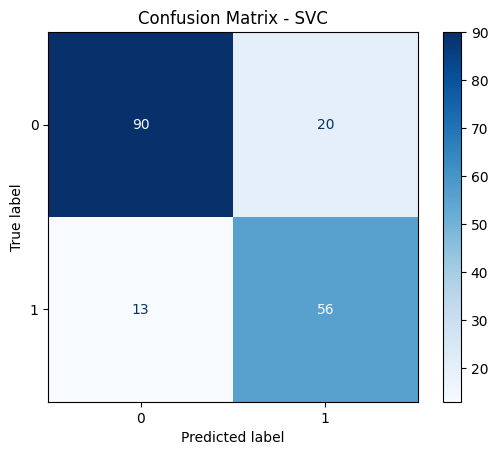

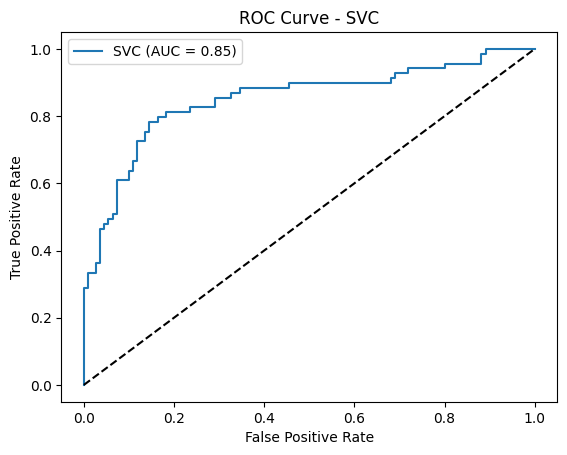

[INFO] No feature importance or coefficients for model: SVC
[INFO] SHAP plot not supported or failed: An unknown model type was passed: <class 'sklearn.svm._classes.SVC'>


In [68]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# 1. Load best model and test set
best_model = joblib.load("outputs/best_model.pkl")
X_test = joblib.load("outputs/X_test.pkl")
y_test = joblib.load("outputs/y_test.pkl")

# Try to get feature names if available
try:
    feature_names = joblib.load("outputs/feature_names.pkl")
except:
    try:
        feature_names = X_test.columns
    except:
        feature_names = [f"Feature {i}" for i in range(X_test.shape[1])]

model_name = type(best_model).__name__

print(f"=== Best Model: {model_name} ===")

# 2. Confusion Matrix
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - {model_name}")
plt.show()

# 3. ROC Curve
if hasattr(best_model, "predict_proba"):
    y_score = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()
elif hasattr(best_model, "decision_function"):
    y_score = best_model.decision_function(X_test)
    auc = roc_auc_score(y_test, y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()
else:
    print(f"[INFO] ROC curve not supported for model: {model_name}")

# 4. Feature Importance or Coefficients
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    idx = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[idx])
    plt.xticks(range(len(importances)), np.array(feature_names)[idx], rotation=45, ha='right')
    plt.title(f"Feature Importance - {model_name}")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()
elif hasattr(best_model, "coef_"):
    coefs = best_model.coef_[0] if hasattr(best_model.coef_, "__len__") else best_model.coef_
    idx = np.argsort(np.abs(coefs))[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(coefs)), coefs[idx])
    plt.xticks(range(len(coefs)), np.array(feature_names)[idx], rotation=45, ha='right')
    plt.title(f"Feature Coefficients - {model_name}")
    plt.ylabel("Coefficient Value")
    plt.tight_layout()
    plt.show()
else:
    print(f"[INFO] No feature importance or coefficients for model: {model_name}")

# 5. SHAP Summary (tree-based or linear models)
try:
    import shap
    explainer = None
    # Only for compatible models
    if model_name in ["RandomForestClassifier", "XGBClassifier", "LGBMClassifier", "CatBoostClassifier", "ExtraTreesClassifier"]:
        explainer = shap.TreeExplainer(best_model)
    elif model_name in ["LogisticRegression", "LinearSVC", "SVC"]:
        explainer = shap.LinearExplainer(best_model, X_test)
    if explainer is not None:
        print("[INFO] Calculating SHAP values...")
        shap_values = explainer.shap_values(X_test)
        shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=True)
except Exception as e:
    print(f"[INFO] SHAP plot not supported or failed: {e}")


In [70]:
import joblib
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Load the correct, SMOTE-processed X and y!
X = joblib.load('outputs/X_train.pkl')
y = joblib.load('outputs/y_train.pkl')
best_model = joblib.load('outputs/best_model.pkl')
print("Best Classifier Used:", type(best_model).__name__)

k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_model, X, y, cv=skf, scoring='accuracy')
print(f"{k}-Fold CV Accuracy Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f} | Std Dev: {np.std(scores):.4f}")

scores_f1 = cross_val_score(best_model, X, y, cv=skf, scoring='f1_weighted')
print(f"Mean F1 Score: {np.mean(scores_f1):.4f}")

scores_roc = cross_val_score(best_model, X, y, cv=skf, scoring='roc_auc')
print(f"Mean ROC AUC: {np.mean(scores_roc):.4f}")


Best Classifier Used: SVC
10-Fold CV Accuracy Scores: [0.875      0.79545455 0.88636364 0.79545455 0.81818182 0.88636364
 0.875      0.84090909 0.85057471 0.8045977 ]
Mean Accuracy: 0.8428 | Std Dev: 0.0353
Mean F1 Score: 0.8425
Mean ROC AUC: 0.9280


## Step 5: Run Your Own Data with Streamlit or CLI

This project lets you run the entire AutoML pipeline on *any* tabular dataset:

- **Streamlit Web App:** No code needed. Upload a CSV, select your target column, and see the model leaderboard and plots.
- **CLI:** Power users can train and benchmark models on new data right from the terminal.

**Why?**  
Automates model selection and tuning for any tabular ML problem—no coding required!

**How to use:**
- For Streamlit: `streamlit run app.py` in terminal
- For CLI: `python main.py --data your.csv --target YourTargetColumn` in terminal 


# .

# .

# .

# Phase 4: Prediction Pipeline (Using the Trained Model)

### What is Phase 4?

Phase 4 enables you to use your trained AutoML model to make predictions on new, **unseen** datasets—without retraining. This allows deployment of the model for real-world tasks like batch predictions or scoring incoming data.

---

### **Key Steps:**

1. **Save the Preprocessing Pipeline**  
   - During training, we fit a preprocessor (for scaling, encoding, etc.) to the training data.  
   - We **save** this preprocessor (`preprocessor.pkl`) so we can reuse *exactly* the same transformations on new data.

2. **Load the Trained Model & Preprocessor**  
   - When making predictions, we load both `best_model.pkl` (the trained model) and `preprocessor.pkl` (the saved transformation pipeline).

3. **Preprocess the New Data**  
   - The new input data is transformed using the saved preprocessor.  
   - This ensures that columns, scaling, and encoding are consistent with training, preventing errors and data leakage.

4. **Run Predictions**  
   - The transformed data is passed to the model to generate predictions.

5. **Export or Display Results**  
   - Results are merged back into the original new data and can be displayed, analyzed, or downloaded as a new CSV file.

---

### **Why is this important?**

- **Consistency:** Ensures new data receives *identical* preprocessing as training data.
- **Reproducibility:** Makes it possible to deploy models in production, score new data in batches, or share predictions with others.
- **Automation:** The entire workflow can run without manual intervention, making it suitable for real-world use.

---

### **Example Usage:**

- Upload a new dataset with the same columns as your training set.
- The app will preprocess, predict, and let you download the results.

---


## Phase 5: Deployment (Web App)

**Goal:**  
Deploy the AutoML pipeline as an interactive Streamlit web application so users can train models and make predictions via a browser—no coding required.

---

### What’s Included

- User-friendly web interface (Streamlit)
- Upload CSV files, select target columns, and train multiple models
- Visualize model performance and download results
- Predict on new, unseen data directly from the web UI

---

### How To Use


2. **Launch the web app**
    ```bash
    streamlit run app.py
    ```

3. **Workflow**
    - Upload your dataset (CSV)
    - Select the target column
    - Click “Run AutoML Pipeline” to train and compare models
    - View model leaderboard, charts, and metrics
    - Upload a new CSV to generate predictions (Phase 4)
    - Download results as CSV

4. **(Optional) Deploy online**  
   Host the app using [Streamlit Cloud](https://streamlit.io/cloud) or similar services for broader access.

---

### Why This Matters

- **No code required:** Anyone can build, evaluate, and use ML models.
- **Simple sharing:** Great for classrooms, demos, and teams.
- **Flexible:** Works locally or can be hosted online for public access.

---

> **With Phase 5 complete, your AutoML pipeline is now accessible and practical for any user.**
